##YOLOv7
https://github.com/WongKinYiu/yolov7

In [ ]:
import shutil
shutil.rmtree('/content/yolov5')

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import IPython
%cd /content
!git clone https://github.com/WongKinYiu/yolov7.git
%cd yolov7
%pip install -r requirements.txt

import torch
from IPython.display import Image,clear_output

/content
fatal: destination path 'yolov7' already exists and is not an empty directory.
/content/yolov7
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%mkdir /content/yolov7/semi3
%cd /content/yolov7/semi3

/content/yolov7/semi3


In [ ]:
!curl -L "https://app.roboflow.com/ds/kuoiNbGJDc?key=GuVWkYODq0" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   901  100   901    0     0   3575      0 --:--:-- --:--:-- --:--:--  3575
100 22.9M  100 22.9M    0     0  10.2M      0  0:00:02  0:00:02 --:--:-- 12.8M
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/curve_synthesis_pattern1_1_jpg.rf.1d1ccaa08bfc2902ba9d1db11c68df4d.jpg  
 extracting: test/images/curve_synthesis_pattern1_1_jpg.rf.50c25d1e4e0d3e8e233e8272789ef06f.jpg  
 extracting: test/images/curve_synthesis_pattern1_1_jpg.rf.58ff95e608ed98c7c5dbf04bd0c9c488.jpg  
 extracting: test/images/curve_synthesis_pattern1_1_jpg.rf.f3525f609b368170ce04ce3b05be1f20.jpg  
 extracting: test/images/pattern_1-1-1-07-D_jpg.rf.18e46e3f62258dfda7d2039b4735167c.jpg  
 extracting: test/im

In [ ]:
from glob import glob #glob모듈의 glob 함수는 사용자가 제시한 조건에 맞는 파일명을 리스트 형식으로 반환

train_img_list = glob('/content/yolov7/semi3/train/images/*.jpg')
test_img_list = glob('/content/yolov7/semi3/test/images/*.jpg')
val_img_list = glob('/content/yolov7/semi3/valid/images/*.jpg')
print(len(train_img_list),len(test_img_list),len(val_img_list))

896 128 256


In [ ]:
with open('/content/yolov7/semi3/train.txt', 'w') as f:
  f.write('\n'.join(train_img_list)+'\n')

with open('/content/yolov7/semi3/test.txt', 'w') as f:
  f.write('\n'.join(test_img_list)+'\n')

with open('/content/yolov7/semi3/val.txt', 'w') as f:
  f.write('\n'.join(val_img_list)+'\n')

print(len(train_img_list),len(test_img_list),len(val_img_list))

896 128 256


In [ ]:
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic # decorator
def writetemplate(line,cell):
  with open(line,'w') as f:
    f.write(cell.format(**globals()))


In [ ]:
import yaml
%cat /content/yolov7/semi3/data.yaml

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 14
names: ['bdot', 'circle', 'curve', 'cut', 'cutoff', 'dcircle', 'dot', 'dsquare', 'fat', 'hcircle', 'out', 'scratch', 'short', 'thin']

roboflow:
  workspace: hyung-joong-kim-e8dti
  project: -2-vjx4g
  version: 2
  license: CC BY 4.0
  url: https://universe.roboflow.com/hyung-joong-kim-e8dti/-2-vjx4g/dataset/2

In [ ]:
%%writetemplate /content/yolov7/semi3/data.yaml

train: ./semi3/train.txt
val: ./semi3/val.txt
test: ./semi3/test.txt

nc: 14
names: ['bdot', 'circle', 'curve', 'cut', 'cutoff', 'dcircle', 'dot', 'dsquare', 'fat', 'hcircle', 'out', 'scratch', 'short', 'thin']

In [ ]:
import yaml
%cat /content/yolov7/semi3/data.yaml


train: ./semi3/train.txt
val: ./semi3/val.txt
test: ./semi3/test.txt

nc: 14
names: ['bdot', 'circle', 'curve', 'cut', 'cutoff', 'dcircle', 'dot', 'dsquare', 'fat', 'hcircle', 'out', 'scratch', 'short', 'thin']


In [ ]:
# 모델 구성
import yaml
with open('/content/yolov7/semi3/data.yaml', 'r') as stream:
  num_classes = str(yaml.safe_load(stream)['nc'])

%cat /content/yolov7/cfg/training/yolov7.yaml


# parameters
nc: 80  # number of classes
depth_multiple: 1.0  # model depth multiple
width_multiple: 1.0  # layer channel multiple

# anchors
anchors:
  - [12,16, 19,36, 40,28]  # P3/8
  - [36,75, 76,55, 72,146]  # P4/16
  - [142,110, 192,243, 459,401]  # P5/32

# yolov7 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [32, 3, 1]],  # 0
  
   [-1, 1, Conv, [64, 3, 2]],  # 1-P1/2      
   [-1, 1, Conv, [64, 3, 1]],
   
   [-1, 1, Conv, [128, 3, 2]],  # 3-P2/4  
   [-1, 1, Conv, [64, 1, 1]],
   [-2, 1, Conv, [64, 1, 1]],
   [-1, 1, Conv, [64, 3, 1]],
   [-1, 1, Conv, [64, 3, 1]],
   [-1, 1, Conv, [64, 3, 1]],
   [-1, 1, Conv, [64, 3, 1]],
   [[-1, -3, -5, -6], 1, Concat, [1]],
   [-1, 1, Conv, [256, 1, 1]],  # 11
         
   [-1, 1, MP, []],
   [-1, 1, Conv, [128, 1, 1]],
   [-3, 1, Conv, [128, 1, 1]],
   [-1, 1, Conv, [128, 3, 2]],
   [[-1, -3], 1, Concat, [1]],  # 16-P3/8  
   [-1, 1, Conv, [128, 1, 1]],
   [-2, 1, Conv, [128, 1, 1]],
   [-1, 1, Conv, [128, 3, 1]],

In [ ]:
%%writetemplate /content/yolov7/models/custom_yolov7s.yaml
# parameters
nc: 14  # number of classes
depth_multiple: 1.0  # model depth multiple
width_multiple: 1.0  # layer channel multiple

# anchors
anchors:
  - [12,16, 19,36, 40,28]  # P3/8
  - [36,75, 76,55, 72,146]  # P4/16
  - [142,110, 192,243, 459,401]  # P5/32

# yolov7 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [32, 3, 1]],  # 0
  
   [-1, 1, Conv, [64, 3, 2]],  # 1-P1/2      
   [-1, 1, Conv, [64, 3, 1]],
   
   [-1, 1, Conv, [128, 3, 2]],  # 3-P2/4  
   [-1, 1, Conv, [64, 1, 1]],
   [-2, 1, Conv, [64, 1, 1]],
   [-1, 1, Conv, [64, 3, 1]],
   [-1, 1, Conv, [64, 3, 1]],
   [-1, 1, Conv, [64, 3, 1]],
   [-1, 1, Conv, [64, 3, 1]],
   [[-1, -3, -5, -6], 1, Concat, [1]],
   [-1, 1, Conv, [256, 1, 1]],  # 11
         
   [-1, 1, MP, []],
   [-1, 1, Conv, [128, 1, 1]],
   [-3, 1, Conv, [128, 1, 1]],
   [-1, 1, Conv, [128, 3, 2]],
   [[-1, -3], 1, Concat, [1]],  # 16-P3/8  
   [-1, 1, Conv, [128, 1, 1]],
   [-2, 1, Conv, [128, 1, 1]],
   [-1, 1, Conv, [128, 3, 1]],
   [-1, 1, Conv, [128, 3, 1]],
   [-1, 1, Conv, [128, 3, 1]],
   [-1, 1, Conv, [128, 3, 1]],
   [[-1, -3, -5, -6], 1, Concat, [1]],
   [-1, 1, Conv, [512, 1, 1]],  # 24
         
   [-1, 1, MP, []],
   [-1, 1, Conv, [256, 1, 1]],
   [-3, 1, Conv, [256, 1, 1]],
   [-1, 1, Conv, [256, 3, 2]],
   [[-1, -3], 1, Concat, [1]],  # 29-P4/16  
   [-1, 1, Conv, [256, 1, 1]],
   [-2, 1, Conv, [256, 1, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [[-1, -3, -5, -6], 1, Concat, [1]],
   [-1, 1, Conv, [1024, 1, 1]],  # 37
         
   [-1, 1, MP, []],
   [-1, 1, Conv, [512, 1, 1]],
   [-3, 1, Conv, [512, 1, 1]],
   [-1, 1, Conv, [512, 3, 2]],
   [[-1, -3], 1, Concat, [1]],  # 42-P5/32  
   [-1, 1, Conv, [256, 1, 1]],
   [-2, 1, Conv, [256, 1, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [[-1, -3, -5, -6], 1, Concat, [1]],
   [-1, 1, Conv, [1024, 1, 1]],  # 50
  ]

# yolov7 head
head:
  [[-1, 1, SPPCSPC, [512]], # 51
  
   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [37, 1, Conv, [256, 1, 1]], # route backbone P4
   [[-1, -2], 1, Concat, [1]],
   
   [-1, 1, Conv, [256, 1, 1]],
   [-2, 1, Conv, [256, 1, 1]],
   [-1, 1, Conv, [128, 3, 1]],
   [-1, 1, Conv, [128, 3, 1]],
   [-1, 1, Conv, [128, 3, 1]],
   [-1, 1, Conv, [128, 3, 1]],
   [[-1, -2, -3, -4, -5, -6], 1, Concat, [1]],
   [-1, 1, Conv, [256, 1, 1]], # 63
   
   [-1, 1, Conv, [128, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [24, 1, Conv, [128, 1, 1]], # route backbone P3
   [[-1, -2], 1, Concat, [1]],
   
   [-1, 1, Conv, [128, 1, 1]],
   [-2, 1, Conv, [128, 1, 1]],
   [-1, 1, Conv, [64, 3, 1]],
   [-1, 1, Conv, [64, 3, 1]],
   [-1, 1, Conv, [64, 3, 1]],
   [-1, 1, Conv, [64, 3, 1]],
   [[-1, -2, -3, -4, -5, -6], 1, Concat, [1]],
   [-1, 1, Conv, [128, 1, 1]], # 75
      
   [-1, 1, MP, []],
   [-1, 1, Conv, [128, 1, 1]],
   [-3, 1, Conv, [128, 1, 1]],
   [-1, 1, Conv, [128, 3, 2]],
   [[-1, -3, 63], 1, Concat, [1]],
   
   [-1, 1, Conv, [256, 1, 1]],
   [-2, 1, Conv, [256, 1, 1]],
   [-1, 1, Conv, [128, 3, 1]],
   [-1, 1, Conv, [128, 3, 1]],
   [-1, 1, Conv, [128, 3, 1]],
   [-1, 1, Conv, [128, 3, 1]],
   [[-1, -2, -3, -4, -5, -6], 1, Concat, [1]],
   [-1, 1, Conv, [256, 1, 1]], # 88
      
   [-1, 1, MP, []],
   [-1, 1, Conv, [256, 1, 1]],
   [-3, 1, Conv, [256, 1, 1]],
   [-1, 1, Conv, [256, 3, 2]],
   [[-1, -3, 51], 1, Concat, [1]],
   
   [-1, 1, Conv, [512, 1, 1]],
   [-2, 1, Conv, [512, 1, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [-1, 1, Conv, [256, 3, 1]],
   [[-1, -2, -3, -4, -5, -6], 1, Concat, [1]],
   [-1, 1, Conv, [512, 1, 1]], # 101
   
   [75, 1, RepConv, [256, 3, 1]],
   [88, 1, RepConv, [512, 3, 1]],
   [101, 1, RepConv, [1024, 3, 1]],

   [[102,103,104], 1, IDetect, [nc, anchors]],   # Detect(P3, P4, P5)
  ]

In [ ]:
!cat /content/yolov7/models/custom_yolov7s.yaml

# parameters
nc: 14  # number of classes
depth_multiple: 1.0  # model depth multiple
width_multiple: 1.0  # layer channel multiple

# anchors
anchors:
  - [12,16, 19,36, 40,28]  # P3/8
  - [36,75, 76,55, 72,146]  # P4/16
  - [142,110, 192,243, 459,401]  # P5/32

# yolov7 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [32, 3, 1]],  # 0
  
   [-1, 1, Conv, [64, 3, 2]],  # 1-P1/2      
   [-1, 1, Conv, [64, 3, 1]],
   
   [-1, 1, Conv, [128, 3, 2]],  # 3-P2/4  
   [-1, 1, Conv, [64, 1, 1]],
   [-2, 1, Conv, [64, 1, 1]],
   [-1, 1, Conv, [64, 3, 1]],
   [-1, 1, Conv, [64, 3, 1]],
   [-1, 1, Conv, [64, 3, 1]],
   [-1, 1, Conv, [64, 3, 1]],
   [[-1, -3, -5, -6], 1, Concat, [1]],
   [-1, 1, Conv, [256, 1, 1]],  # 11
         
   [-1, 1, MP, []],
   [-1, 1, Conv, [128, 1, 1]],
   [-3, 1, Conv, [128, 1, 1]],
   [-1, 1, Conv, [128, 3, 2]],
   [[-1, -3], 1, Concat, [1]],  # 16-P3/8  
   [-1, 1, Conv, [128, 1, 1]],
   [-2, 1, Conv, [128, 1, 1]],
   [-1, 1, Conv, [128, 3, 1]],

In [ ]:
import os
os.getcwd()

'/content/yolov7/semi3'

In [ ]:
%%time
%cd /content/yolov7
!python train.py --img 640 --batch 10 --epochs 1000 --data ./semi3/data.yaml --cfg ./models/custom_yolov7s.yaml --weights '' --name semi-train --cache

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
     4/999      7.5G   0.07901  0.006115   0.03567    0.1208        27       640: 100% 90/90 [00:41<00:00,  2.15it/s]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100% 13/13 [00:04<00:00,  3.21it/s]
                 all         256           0           0           0           0           0

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
     5/999      7.5G   0.07719  0.005818   0.03577    0.1188        27       640: 100% 90/90 [00:41<00:00,  2.15it/s]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100% 13/13 [00:04<00:00,  3.21it/s]
                 all         256           0           0           0           0           0

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
     6/999      7.5G   0.07674   0.0

In [ ]:
%load_ext tensorboard
%tensorboard --logdir runs

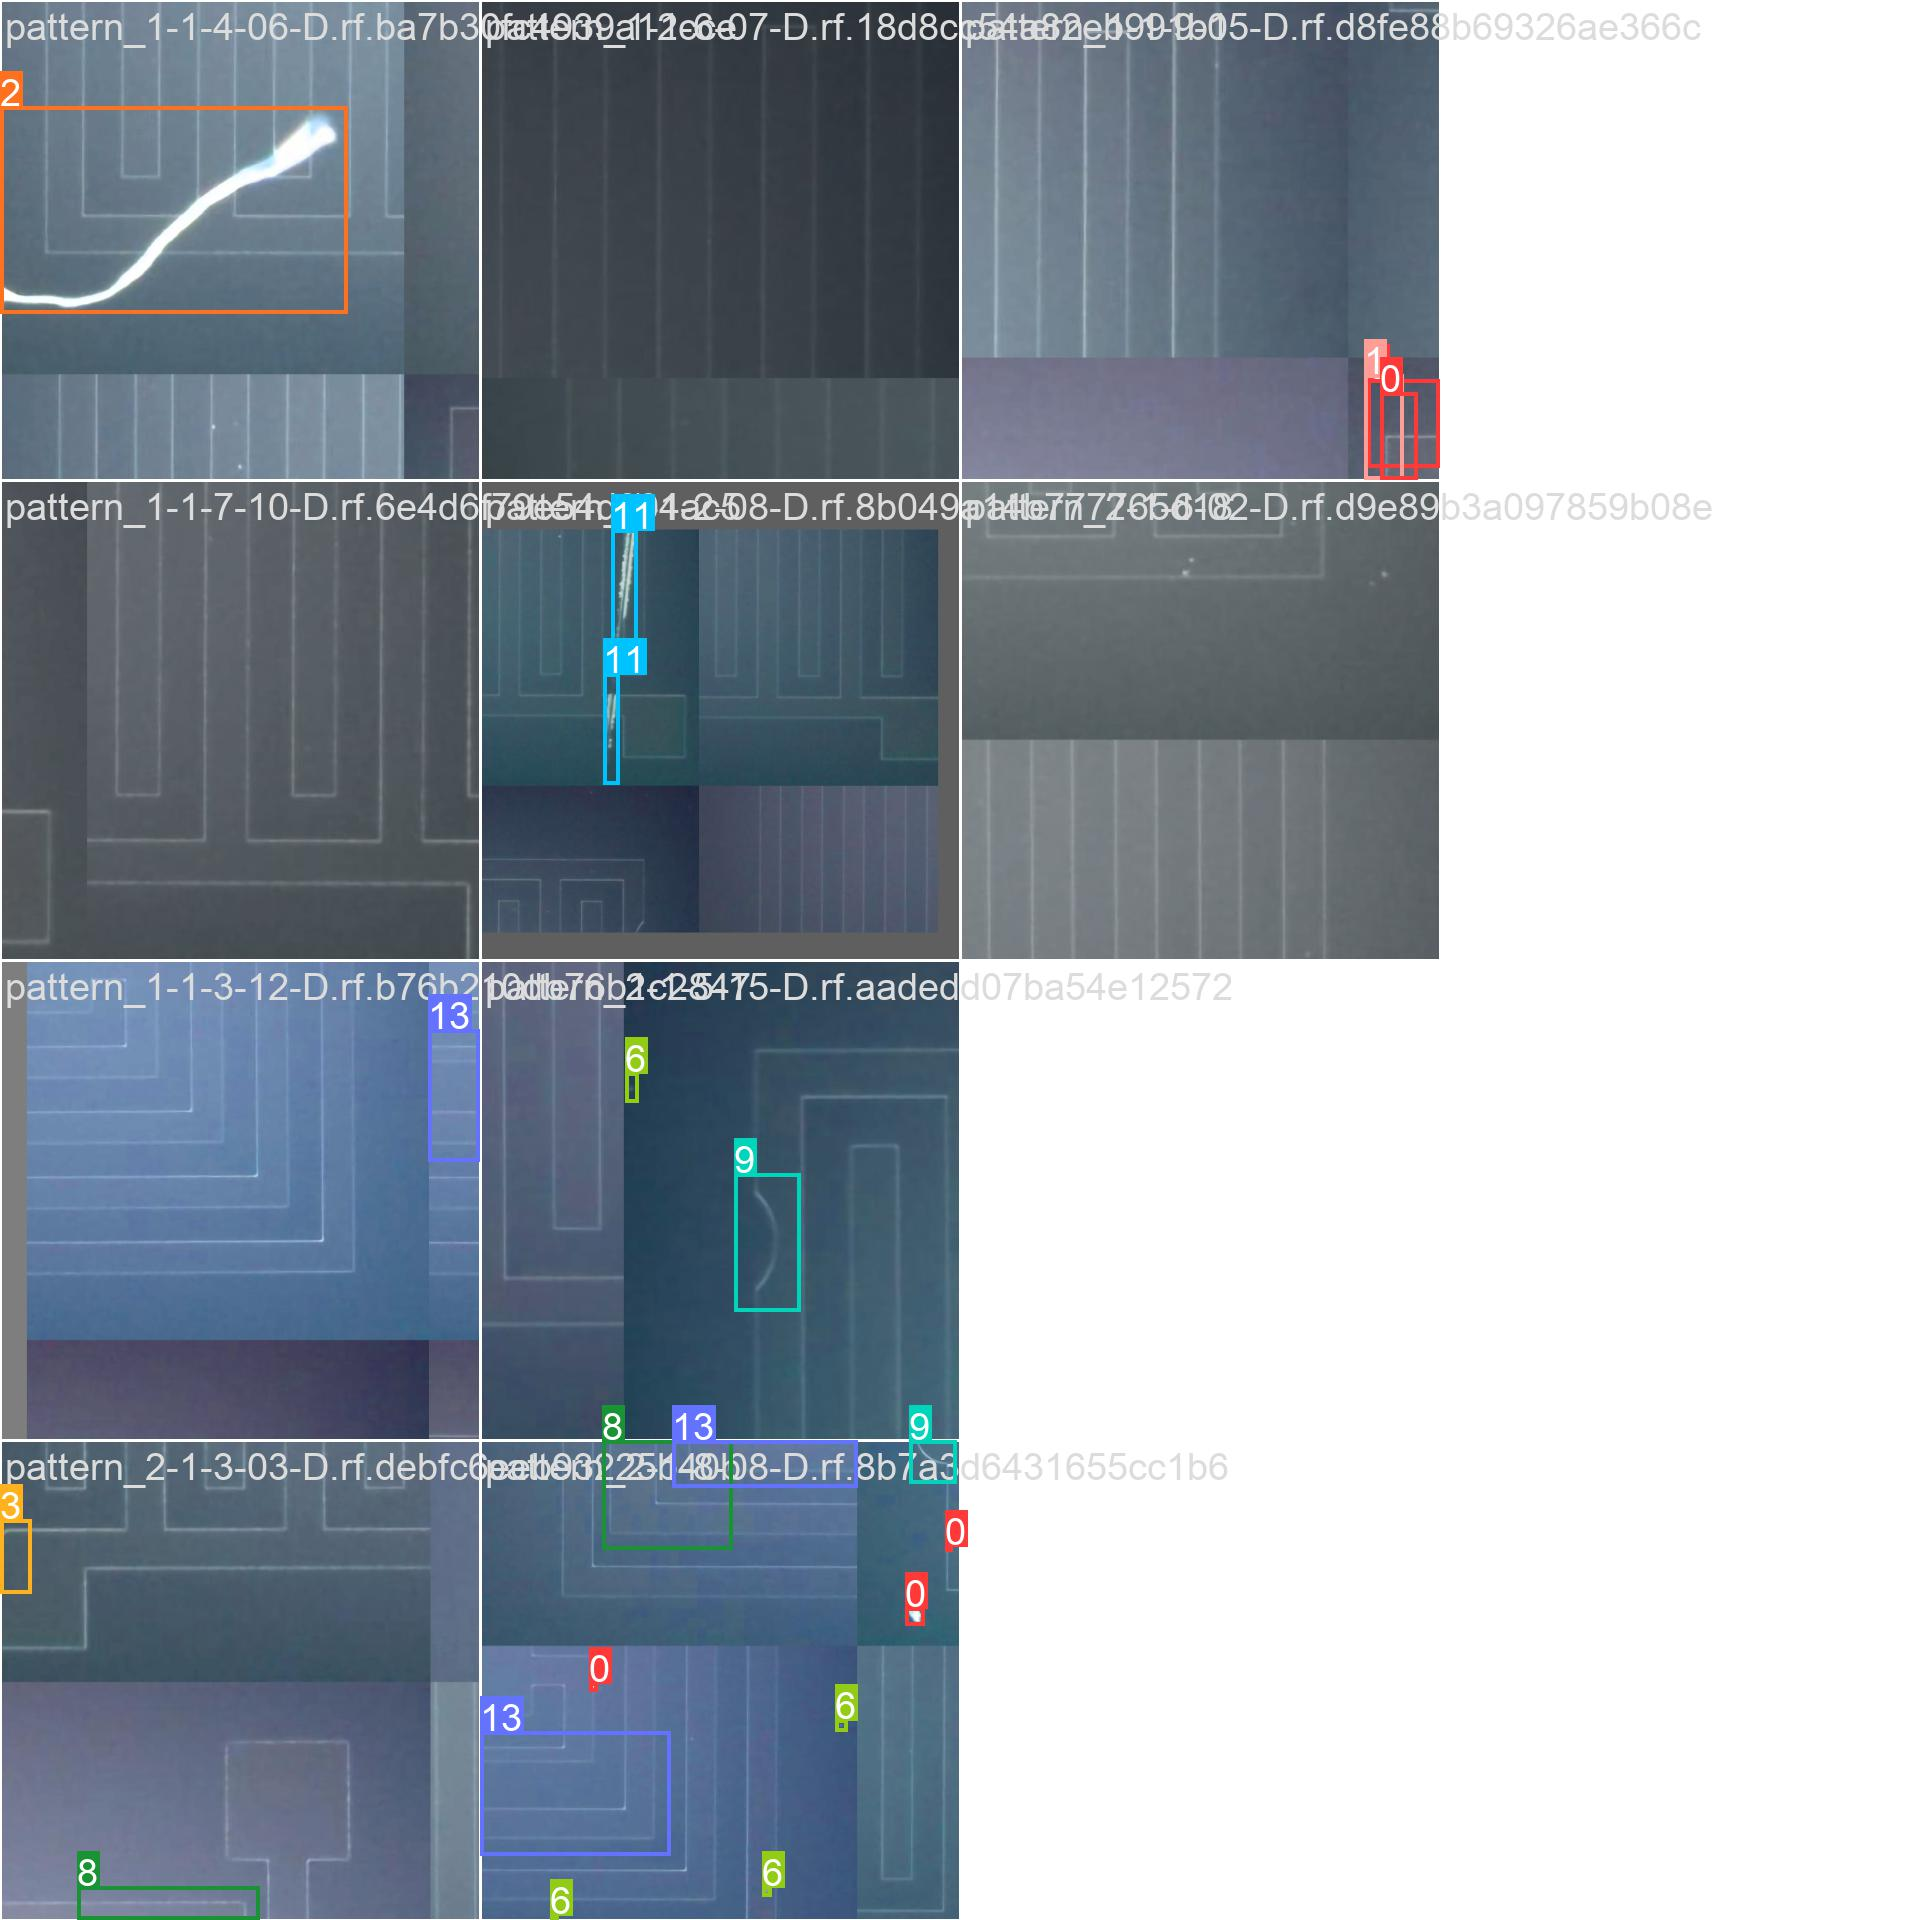

In [ ]:
from IPython.display import Image,clear_output
Image(filename='/content/yolov5/runs/train/car_results/train_batch0.jpg',width=1000)

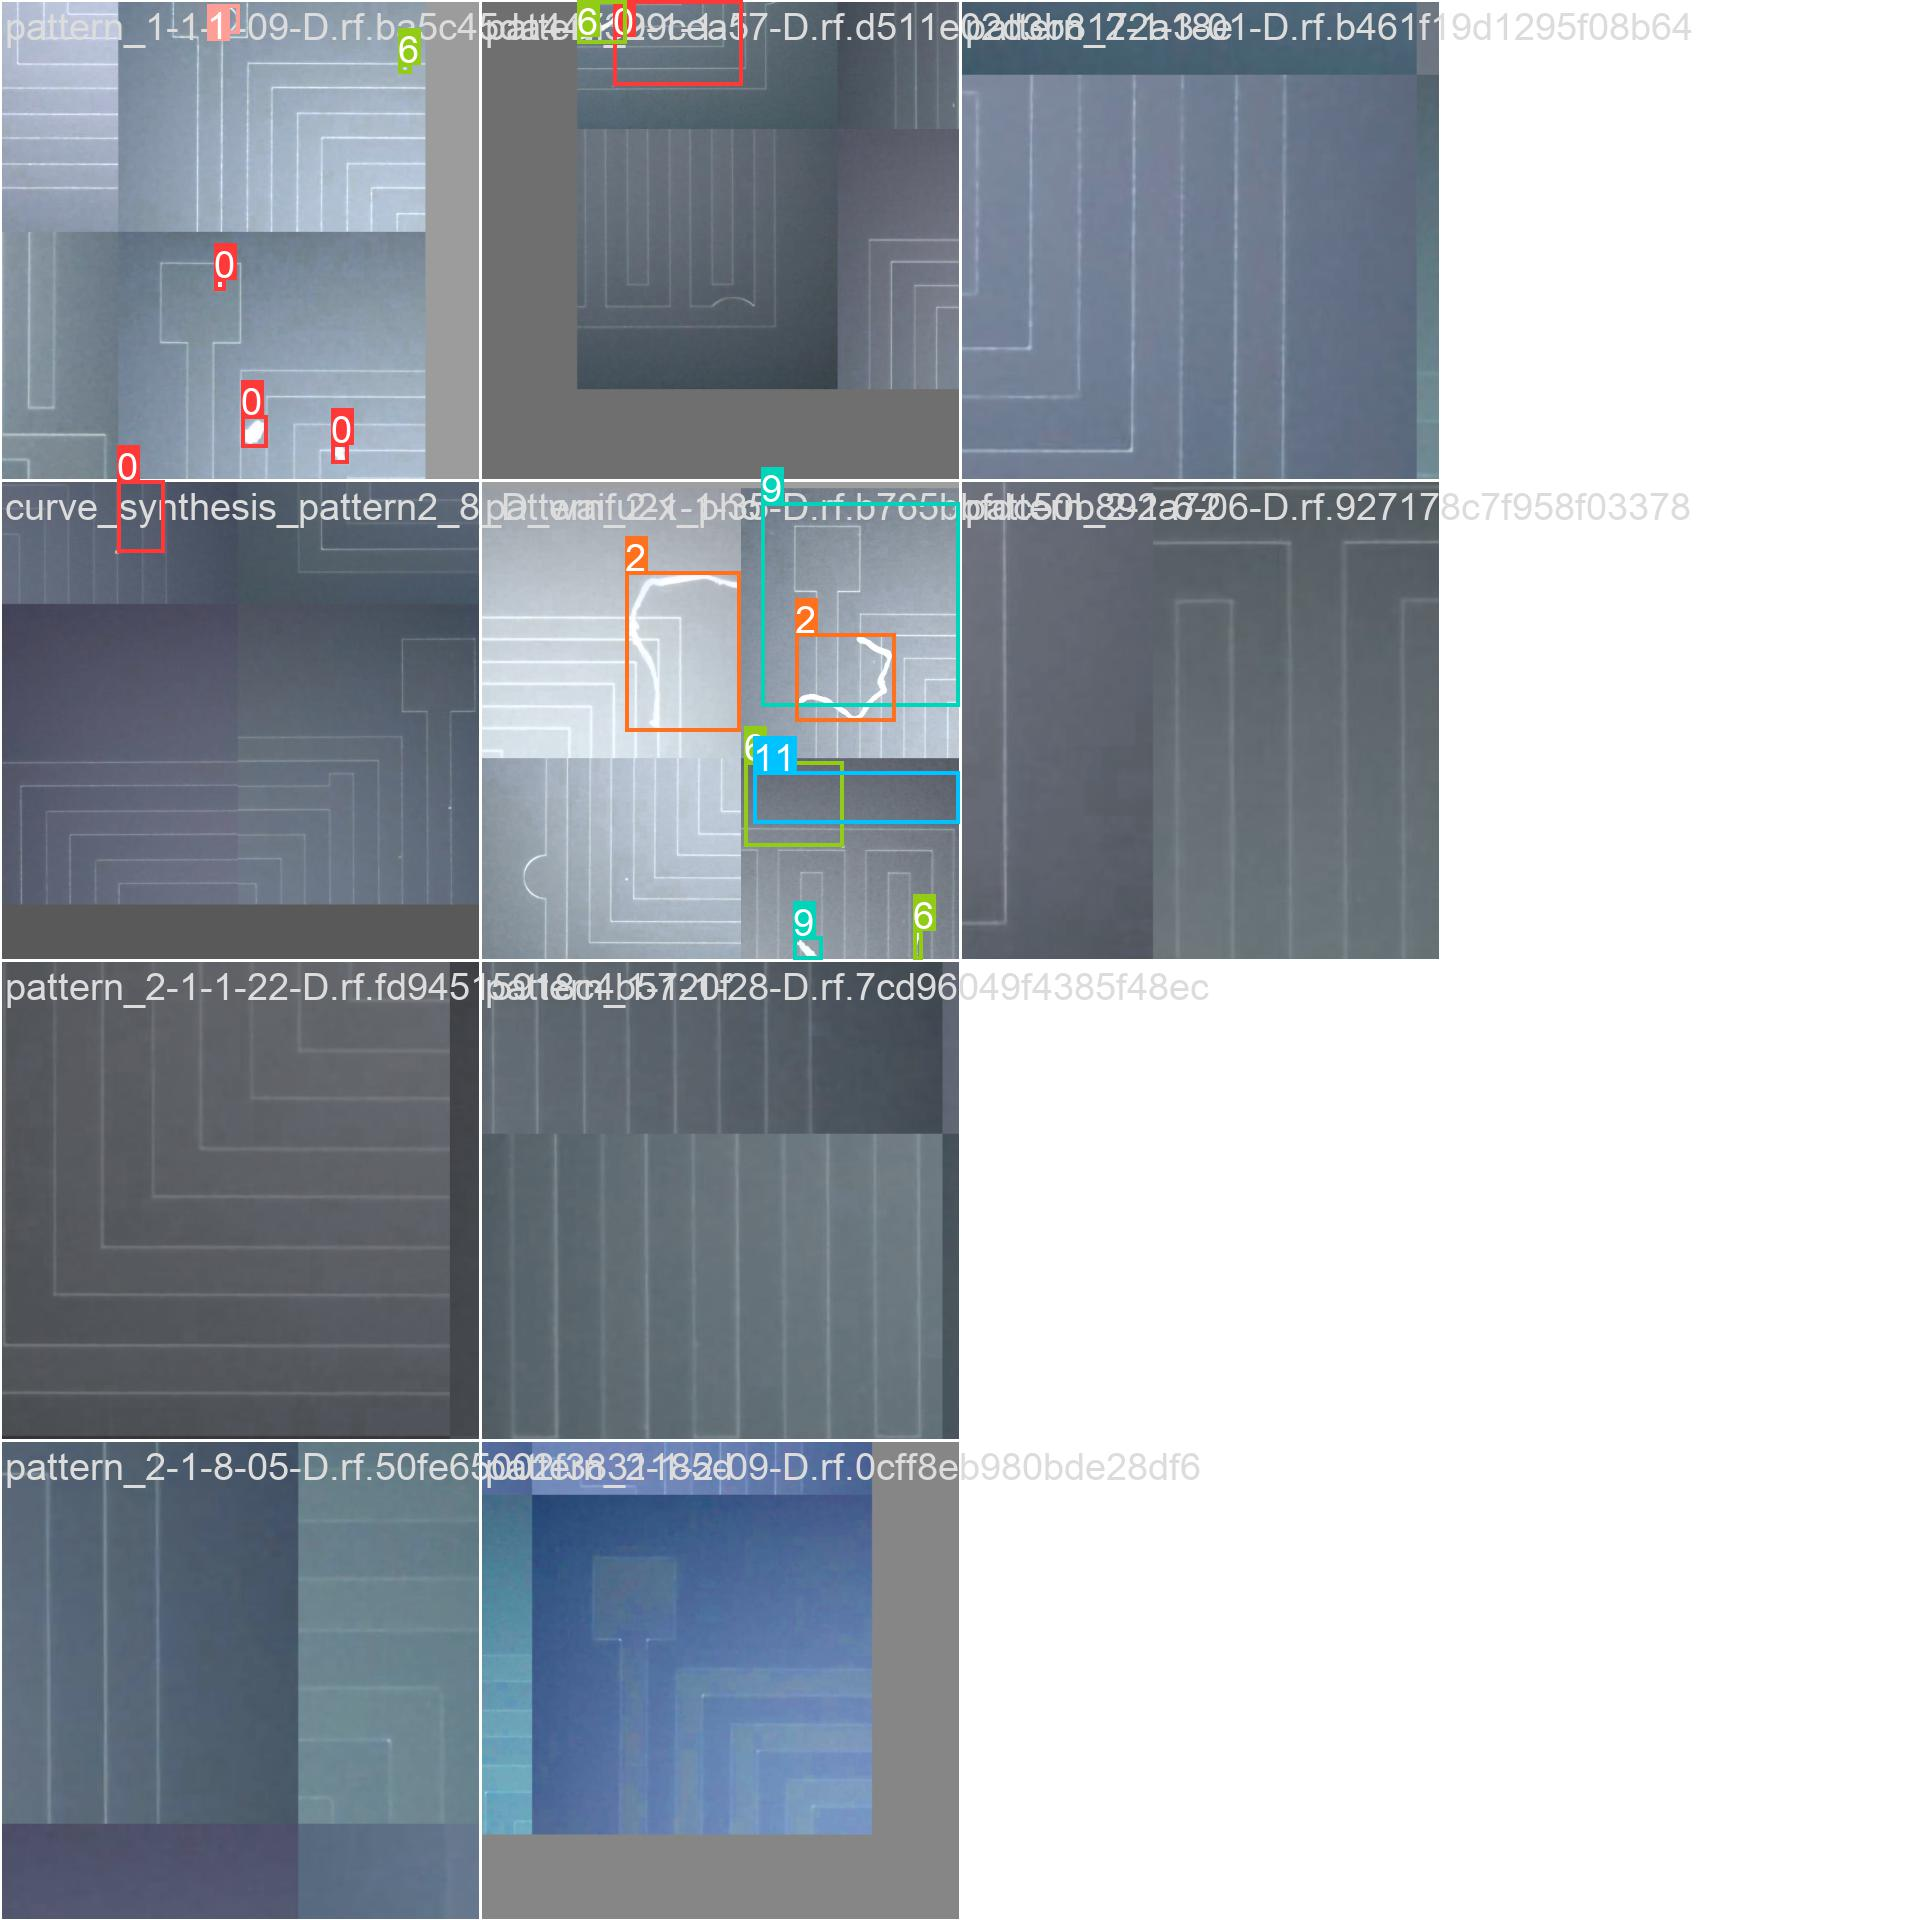

In [ ]:
from IPython.display import Image,clear_output
Image(filename='/content/yolov5/runs/train/car_results/train_batch2.jpg',width=1000)

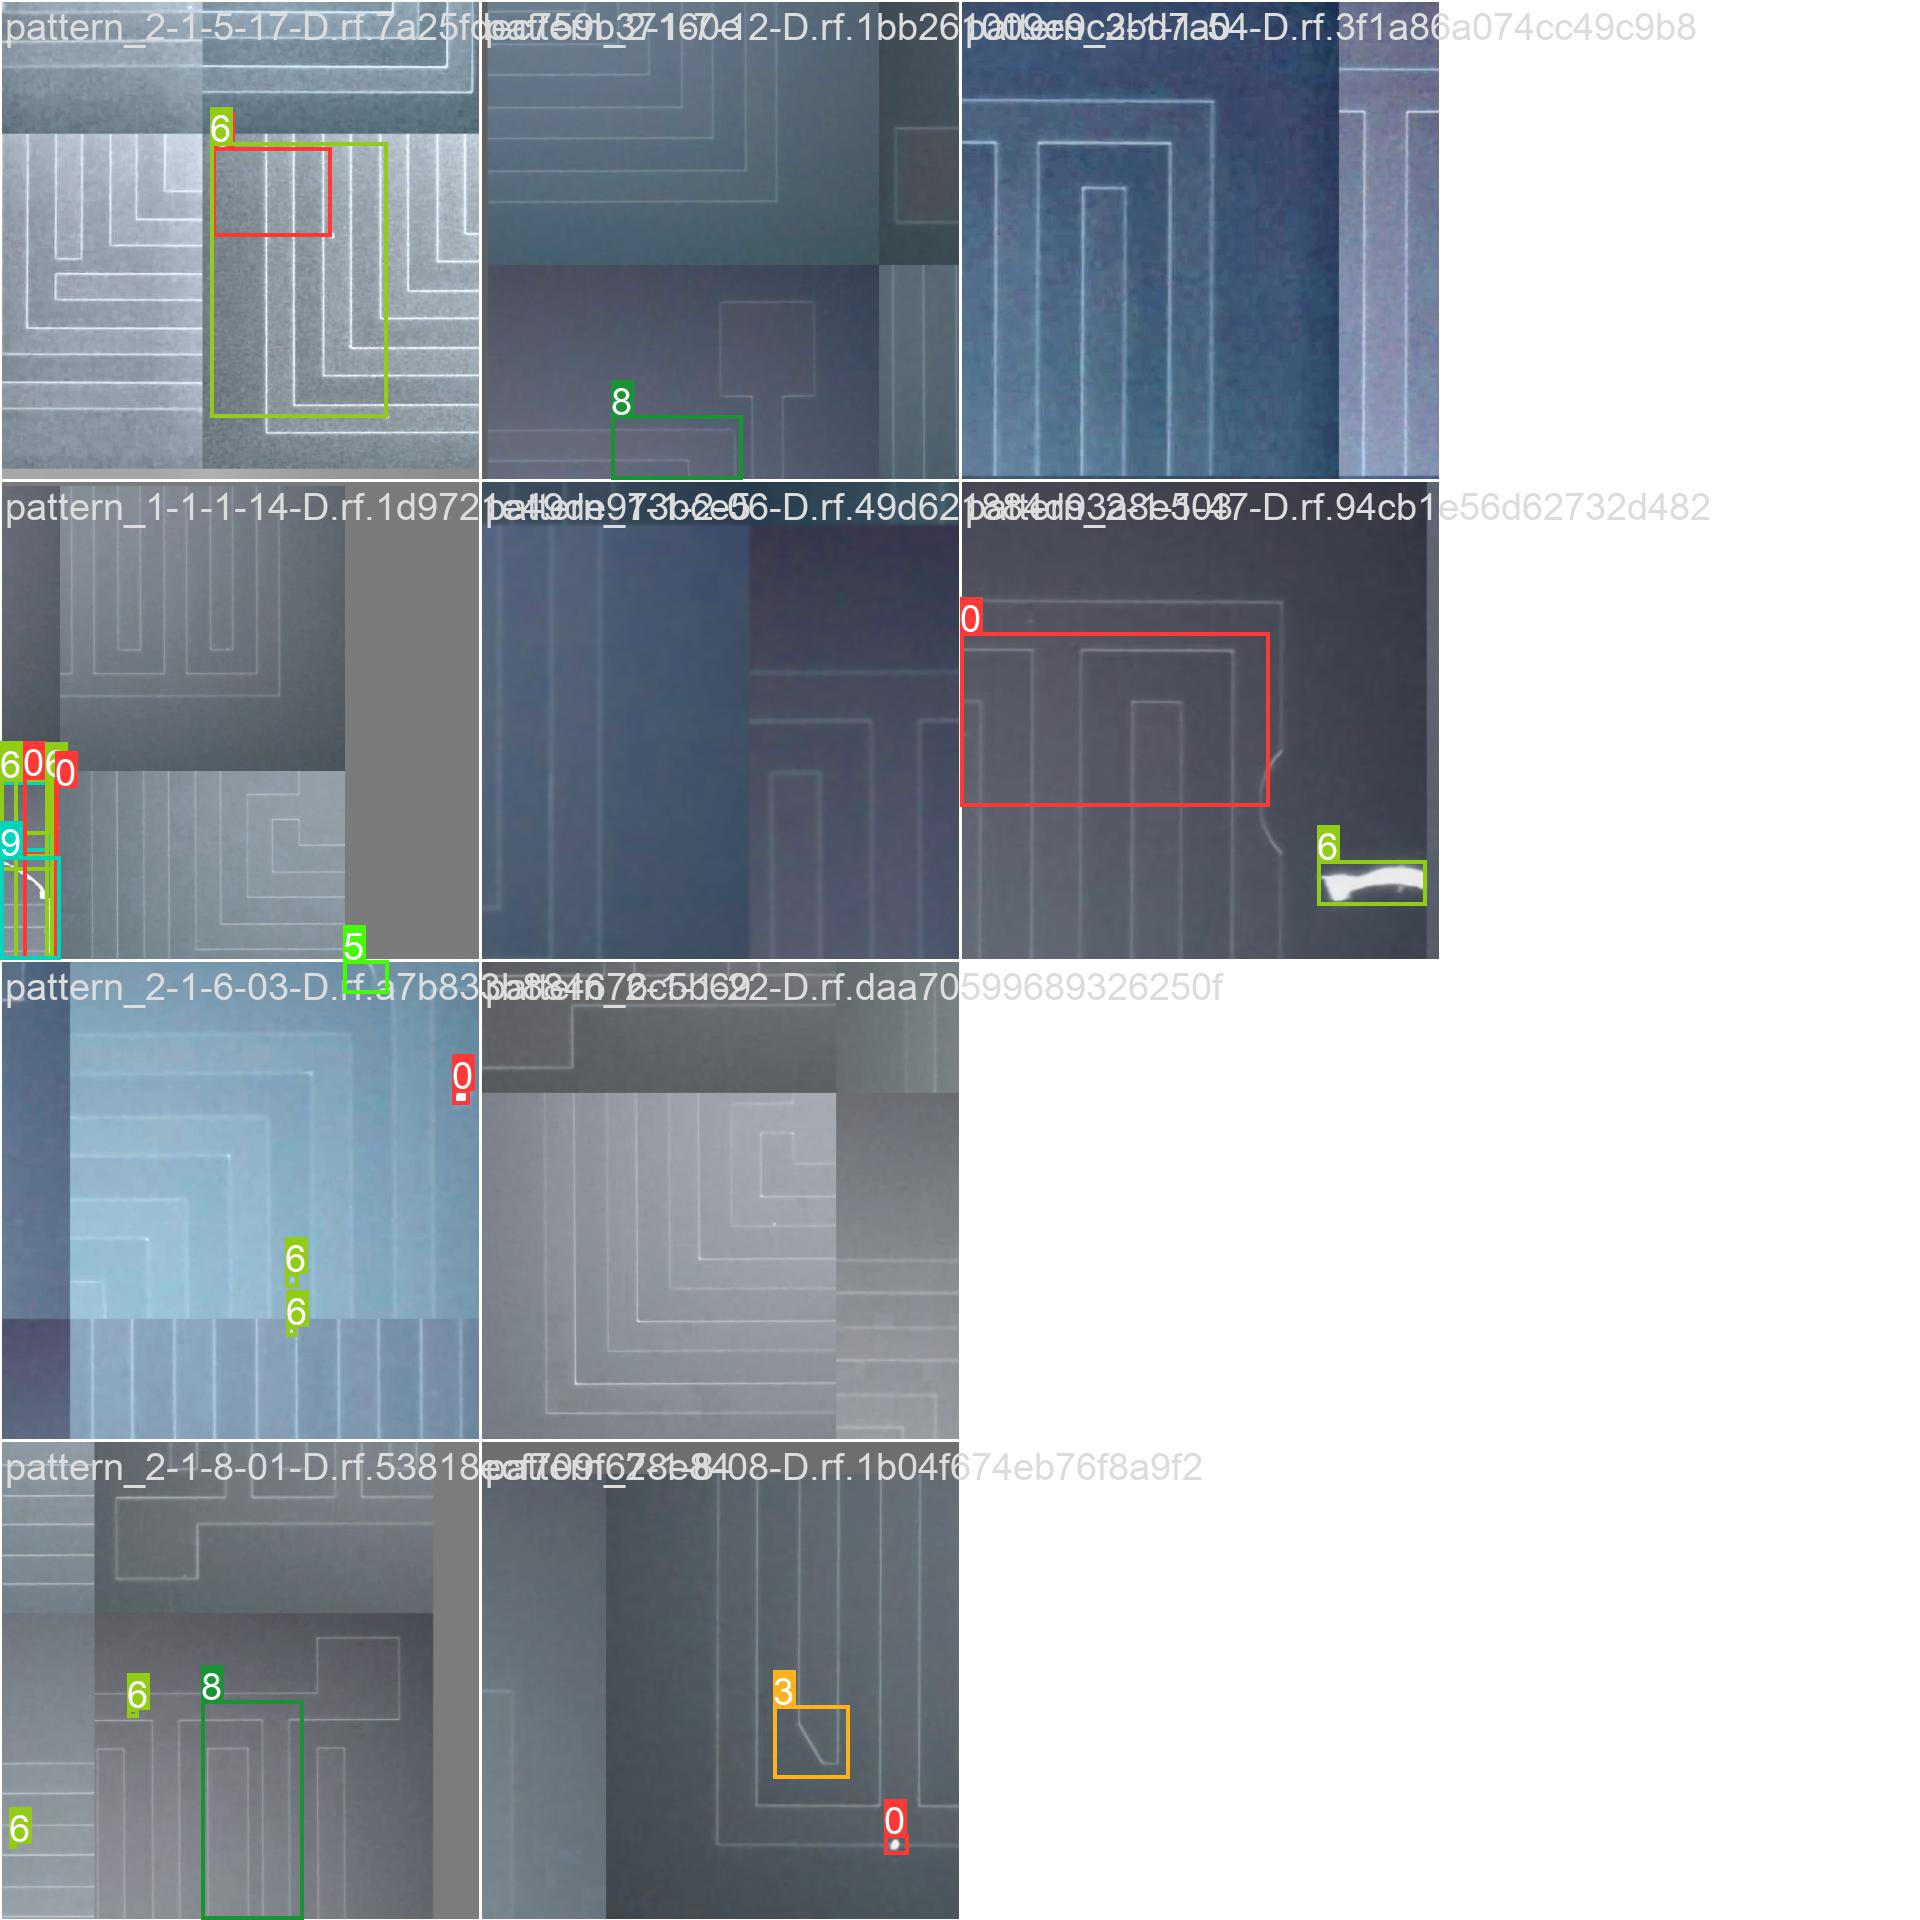

In [ ]:
from IPython.display import Image,clear_output
Image(filename='/content/yolov5/runs/train/car_results/train_batch1.jpg',width=1000)

In [ ]:
# 검증
!python test.py --weights runs/train/semi-train/weights/best.pt --data ./semi3/data.yaml --img 640 --iou 0.65

Namespace(augment=False, batch_size=32, conf_thres=0.001, data='./semi3/data.yaml', device='', exist_ok=False, img_size=640, iou_thres=0.65, name='exp', no_trace=False, project='runs/test', save_conf=False, save_hybrid=False, save_json=False, save_txt=False, single_cls=False, task='val', v5_metric=False, verbose=False, weights=['runs/train/semi-train/weights/best.pt'])
YOLOR 🚀 v0.1-121-g2fdc7f1 torch 1.13.1+cu116 CUDA:0 (Tesla T4, 15109.875MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 314 layers, 36551894 parameters, 6194944 gradients, 103.4 GFLOPS
 Convert model to Traced-model... 
 traced_script_m

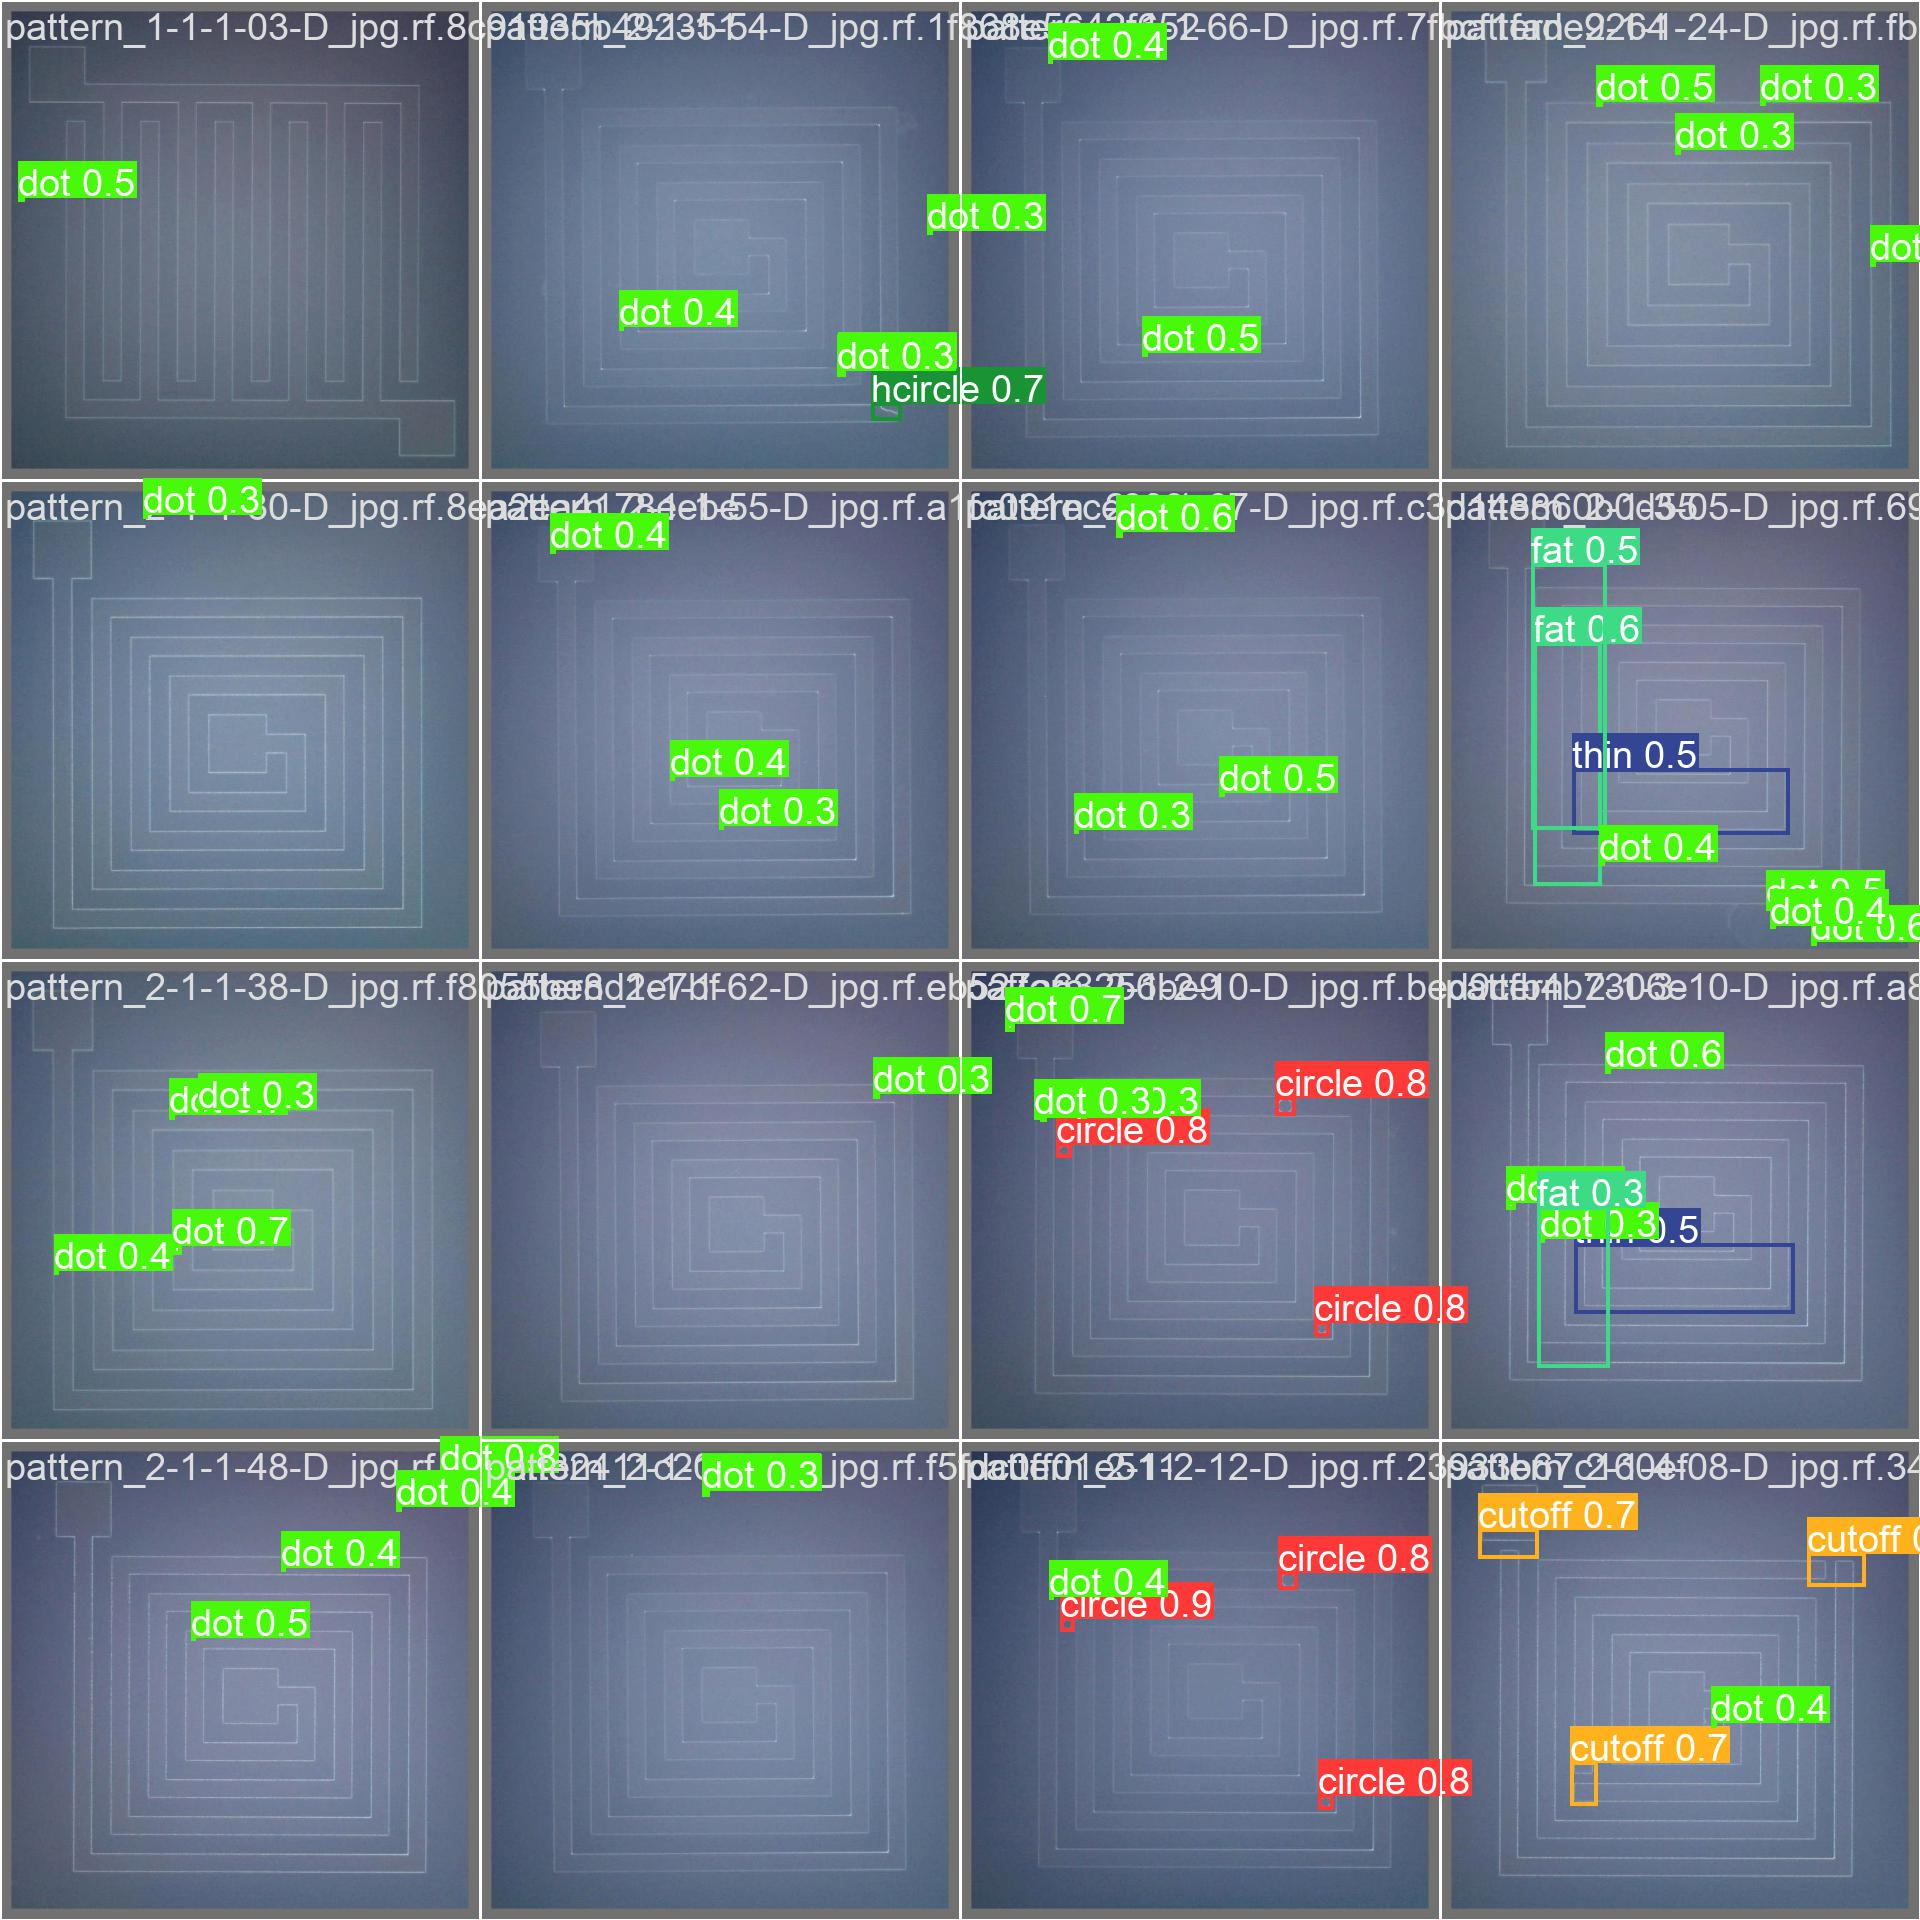

In [ ]:
from IPython.display import Image,clear_output
Image(filename='/content/yolov5/runs/val/exp/val_batch0_pred.jpg',width=1000)

In [ ]:
!python detect.py --weights runs/train/semi-train/weights/best.pt --img 640 --conf 0.4 --source /content/yolov7/semi3/test/images

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', no_trace=False, nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='/content/yolov7/semi3/test/images', update=False, view_img=False, weights=['runs/train/semi-train/weights/best.pt'])
YOLOR 🚀 v0.1-121-g2fdc7f1 torch 1.13.1+cu116 CUDA:0 (Tesla T4, 15109.875MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 314 layers, 36551894 parameters, 6194944 gradients, 103.4 GFLOPS
 Convert model to Traced-model... 
 traced_script_module saved! 
 mo

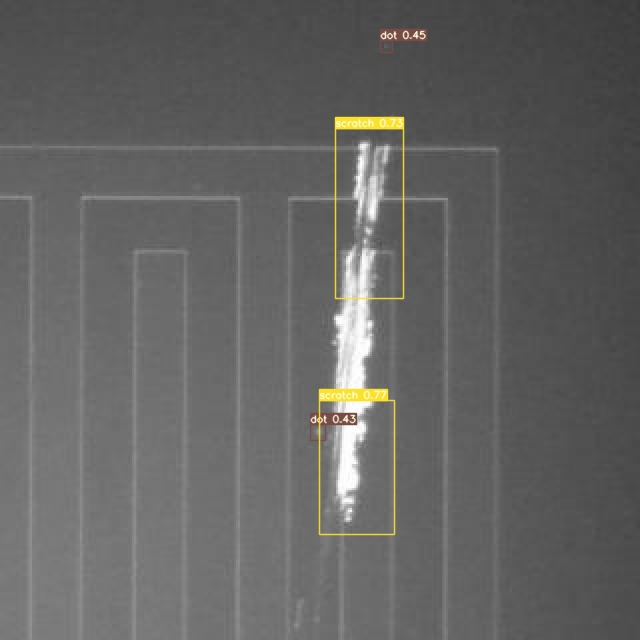

In [ ]:
import glob
import random
from IPython.display import Image, display
image_name = random.choice(glob.glob('/content/yolov7/runs/detect/exp/*.jpg'))
display(Image(filename=image_name))

In [ ]:
# 모델 내보내기
#%mkdir /content/drive/MyDrive/semi3
%cp /content/yolov7/runs/train/semi-train/weights/best.pt /content/drive/MyDrive/semi-epoch1000.pt